In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [1]:
# This file contains all the main external libs we'll use
from fastai.imports import *

In [2]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [27]:
PATH = 'data/fruits-360/'
sz=100

In [28]:
torch.cuda.is_available()

True

In [29]:
torch.backends.cudnn.enabled

True

In [30]:
os.listdir(PATH)

['test-multiple_fruits',
 'LICENSE',
 'readme.md',
 'papers',
 'valid',
 'models',
 'train',
 'tmp']

In [31]:
os.listdir(f'{PATH}valid')

['Apple Red 3',
 'Pepino',
 'Cantaloupe 2',
 'Apple Golden 2',
 'Apple Red Delicious',
 'Avocado ripe',
 'Kaki',
 'Pear Monster',
 'Grape Pink',
 'Plum',
 'Apple Braeburn',
 'Passion Fruit',
 'Mandarine',
 'Cherry 2',
 'Pitahaya Red',
 'Apricot',
 'Apple Golden 3',
 'Apple Red Yellow',
 'Grapefruit Pink',
 'Banana',
 'Cactus fruit',
 'Tangelo',
 'Grape White 2',
 'Apple Red 1',
 'Guava',
 'Kumquats',
 'Banana Red',
 'Papaya',
 'Avocado',
 'Strawberry',
 'Apple Golden 1',
 'Granadilla',
 'Carambula',
 'Pineapple',
 'Salak',
 'Pomegranate',
 'Apple Red 2',
 'Pear Williams',
 'Peach',
 'Raspberry',
 'Litchi',
 'Lemon Meyer',
 'Cantaloupe 1',
 'Peach Flat',
 'Grapefruit White',
 'Orange',
 'Tamarillo',
 'Limes',
 'Clementine',
 'Quince',
 'Grape White',
 'Lemon',
 'Apple Granny Smith',
 'Cocos',
 'Huckleberry',
 'Pear',
 'Cherry 1',
 'Nectarine',
 'Pear Abate',
 'Mango',
 'Cherry Rainier',
 'Kiwi',
 'Maracuja',
 'Dates']

In [32]:
files = os.listdir(f'{PATH}valid/Papaya')[:5]
files

['r_43_100.jpg', 'r_86_100.jpg', '55_100.jpg', 'r_35_100.jpg', '83_100.jpg']

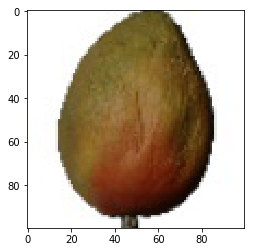

In [33]:
img = plt.imread(f'{PATH}valid/Papaya/{files[2]}')
plt.imshow(img)

In [34]:
img.shape

(100, 100, 3)

In [11]:
# shutil.rmtree(f'{PATH}tmp', ignore_errors=True)

arch = resnet34
data = ImageClassifierData.from_paths(
    PATH, 
    tfms=tfms_from_model(arch, sz)
)

learn = ConvLearner.pretrained(arch, data, precompute=True)

# Choose a learning rate

lrf = learn.lr_find()

100%|██████████| 167/167 [00:29<00:00,  5.61it/s]


 83%|████████▎ | 413/496 [00:07<00:01, 54.69it/s, loss=2.16] 


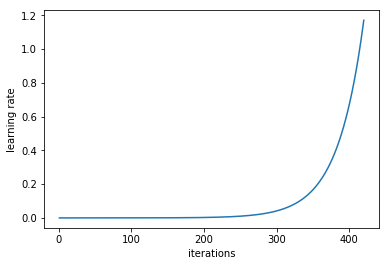

In [12]:
learn.sched.plot_lr()

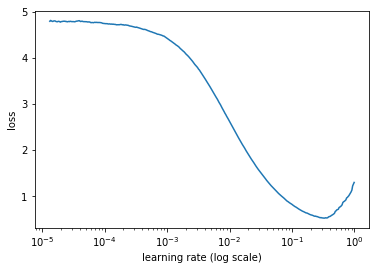

In [13]:
learn.sched.plot()

In [35]:
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 3)

epoch      trn_loss   val_loss   accuracy                    
    0      0.133207   0.119668   0.97382   
    1      0.099781   0.09716    0.976729                     
    2      0.071694   0.080869   0.978606                     



[array([0.08087]), 0.9786056113352726]

In [15]:
# label for a validation data
data.val_y

array([ 0,  0,  0, ..., 63, 63, 63])

In [16]:
len(data.classes)

64

In [17]:
# prediction for the valisation set
log_preds = learn.predict()
log_preds.shape

(10657, 64)

In [18]:
log_preds[250]

array([-16.1505 ,  -0.00487, -10.04889,  -8.52804, -13.25056, -11.88106, -11.65537,  -8.62793, -15.03696,
        -8.4835 , -13.16867, -13.12418, -11.62352, -12.44409, -15.16579, -11.83821, -11.38842,  -7.4727 ,
       -10.15586, -14.78069, -15.29899, -12.74069, -11.54582, -12.33017, -13.39272, -13.70537, -11.23019,
       -11.01921, -12.75623, -13.40408, -10.26846,  -8.47943, -13.35671, -13.13601, -10.60683, -12.02954,
        -6.95274, -13.0637 , -10.91723,  -9.67412,  -9.84473, -13.61709, -11.58042, -13.88663, -11.65188,
       -10.95119, -12.09245, -10.2261 ,  -9.42615, -11.39805, -11.82758,  -7.67819,  -8.48451,  -6.97041,
        -8.88339, -11.58768, -11.13796, -11.00157,  -8.68801, -12.55307, -13.88078, -12.05859, -13.66028,
       -14.6635 ], dtype=float32)

In [19]:
# return the index of the maximum confidence
preds = np.argmax(log_preds, axis=1)

In [20]:
# Predicted class for a sample
data.classes[preds[250]]

'Apple Golden 1'

In [21]:
# Label for the sample
data.classes[data.val_y[250]]

'Apple Golden 1'

# Data augumentation

In [36]:
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [37]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)

100%|██████████| 167/167 [00:10<00:00, 15.74it/s]


In [38]:
learn.fit(1e-2, 5)

epoch      trn_loss   val_loss   accuracy                    
    0      0.150648   0.121223   0.974008  
    1      0.105067   0.101427   0.974383                     
    2      0.060817   0.068706   0.978512                     
    3      0.060801   0.074171   0.979075                     
    4      0.056513   0.062179   0.979544                     



[array([0.06218]), 0.9795439617153044]

# Don't use precomputed weights

In [39]:
learn.precompute=False

In [40]:
learn.fit(1e-2, 3, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                     
    0      0.100173   0.069427   0.974383  
    1      0.072639   0.061359   0.976729                     
    2      0.075019   0.056888   0.976635                     



[array([0.05689]), 0.9766350755372056]

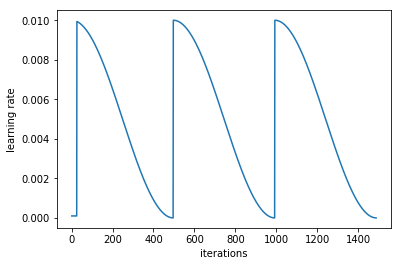

In [41]:
learn.sched.plot_lr()

In [42]:
learn.save('fruit360_lastlayer')

In [43]:
learn.load('fruit360_lastlayer')

# Unfreeze the other layers

In [44]:
learn.unfreeze()

In [45]:
differential_learning_rates = np.array([1e-4, 1e-3, 1e-2])

In [46]:
learn.fit(
    differential_learning_rates,
    3,
    cycle_len=1,
    cycle_mult=2
)

epoch      trn_loss   val_loss   accuracy                     
    0      0.05322    0.044922   0.980764  
    1      0.031325   0.034109   0.983579                     
    2      0.033096   0.028699   0.987708                     
    3      0.018239   0.030698   0.985456                     
    4      0.020598   0.033751   0.986957                     
    5      0.016255   0.034144   0.984799                     
    6      0.017961   0.031242   0.986769                     



[array([0.03124]), 0.9867692596415502]

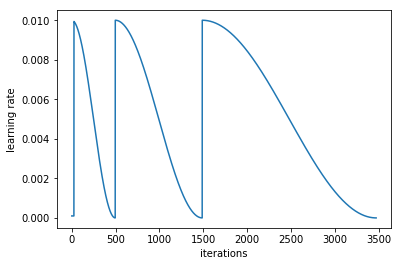

In [47]:
learn.sched.plot_lr()

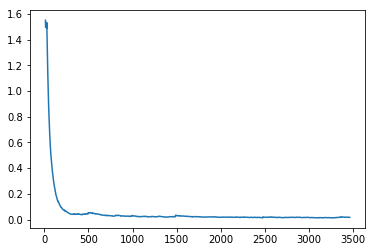

In [48]:
learn.sched.plot_loss()

In [49]:
learn.save('fruit360_all')

In [50]:
learn.load('fruit360_all')

# TTA

In [51]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

In [52]:
accuracy_np(probs, y)

0.9883644552876044